In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# 显示图像
def img_show(img):
    if len(img.shape) == 3:
        if img.shape[-1]==3:
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
        elif img.shape[-1]==4:
            b,g,r,a = cv2.split(img)
            img = img
        plt.imshow(img)
    elif len(img.shape) == 2:
        plt.imshow(img)

In [3]:
# 随机加椒盐函数
def salt(img,n):
    # 循环添加n个椒盐
    for k in range(n):
        # 随机添加椒盐的坐标
        i = int(np.random.random()*img.shape[0])
        j = int(np.random.random()*img.shape[1])
        # 若位灰度图
        img[i,j] = 255
        # 若为RGB图
        img[i,j,0] = 255
        img[i,j,0] = 255
        img[i,j,0] = 255
    return img

In [4]:
# 形态学：数学形态学，主要从图像内提取分量信息，该分量信息通常对于表达和描述图像的形状具有重要意义
# 形态学操作：腐蚀，膨胀，开运算，闭运算，形态学梯度运算，顶帽运算，黑帽运算等
# 腐蚀和膨胀是形态学运算基础，将它们进行结合就可实现其余运算

# 8.1 腐蚀

In [5]:
# 腐蚀用来收缩或细化二值图像中的前景，借此实现去噪声、元素分割等功能
# 腐蚀过程：用结构元来逐个像素扫描被腐蚀图像，并根据结构元和被腐蚀图像的关系确定腐蚀结果
# 注意，腐蚀操作等形态学操作，是逐个像素地来确定值的，每次判定的点都与结构元中心点所对应

# 如果结构元完全处于前景图像中，就将结构元中心点所对应的腐蚀结果图像中的像素点处理为前景色（如1）
# 如果结构元不完全处于前景图像中，就将结构元中心点所对应的腐蚀结果图像中的像素点处理为背景色（如0）
# 结构元也被称为核

# opencv中使用函数cv2.erode()实现腐蚀操作：
# dst = cv2.erode(src,kernel[,anchor[,iterations[,borderType[,borderValue]]]])
# dst：腐蚀后的图像，与原图像同大小，同类型
# src：需要进行腐蚀的原始图像，图像通道数可以是任意的，但要求图像的深度必须是CV_8U,CV_16U,CV_16S,CV_32F,CV_64F中的一种
# kernel：腐蚀操作所采用的结构类型，可自定义，也可通过函数cv2.getStructuringElement()生成
# anchor：代表element结构中锚点的位置，默认值（-1，-1），核的中心位置
# iterations：腐蚀操作迭代的次数，默认为1，只进行一次腐蚀操作
# borderType：边界样式，见书P171
# borderValue：边界值，一般采用默认值

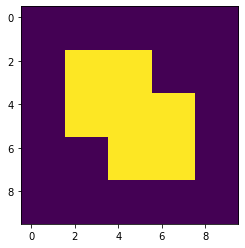

In [6]:
img = np.zeros([10,10],dtype=np.uint8)
img[2:6,2:6] = 255
img[4:8,4:8] = 255
kernel = np.ones((3,3),dtype=np.uint8)
erosion = cv2.erode(img,kernel)
img_show(img)

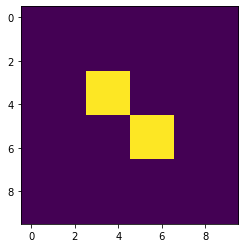

In [7]:
img_show(erosion)

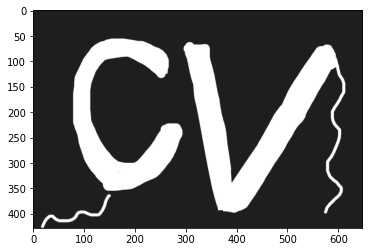

In [29]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
kernel = np.ones((7,7),dtype=np.uint8)
erosion = cv2.erode(cv,kernel,iterations=3)
img_show(cv)

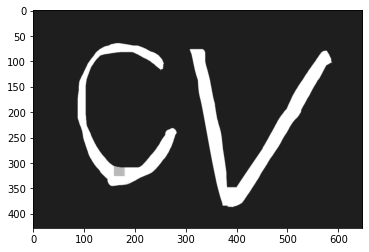

In [30]:
img_show(erosion)

# 8.2 膨胀

In [32]:
# 与腐蚀相反，对图像边缘进行扩张
# 如果结构元中有任意一点处于前景图像中，就将膨胀结果图像中对应像素点处理为前景色（kernel中心点对应像素点）
# 如果结构元完全处于背景图像外，就将膨胀结果图像中对应像素点处理成背景色（kernel中心点对应像素点）

# opencv中使用函数cv2.dilate()实现对图像的膨胀：
# dst = cv2.dilate(img,kernel[,ahchor[,iterations[,borderType]]])
# dst：膨胀后的图像，与原始图像同大小，同类型
# src：需要进行腐蚀的原始图像，图像通道数可以是任意的，但要求图像的深度必须是CV_8U,CV_16U,CV_16S,CV_32F,CV_64F中的一种
# kernel：腐蚀操作所采用的结构类型，可自定义，也可通过函数cv2.getStructuringElement()生成
# anchor：代表element结构中锚点的位置，默认值（-1，-1），核的中心位置
# iterations：腐蚀操作迭代的次数，默认为1，只进行一次腐蚀操作
# borderType：边界样式，见书P171
# borderValue：边界值，一般采用默认值

In [36]:
img = np.zeros([5,5],dtype=np.uint8)
img[2:3,1:5] = 1
kernel = np.ones([3,1],dtype=np.uint8)
imgPZ = cv2.dilate(img,kernel)
print("img\n",img)
print("imgPZ\n",imgPZ)

img
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 1 1 1]
 [0 0 0 0 0]
 [0 0 0 0 0]]
imgPZ
 [[0 0 0 0 0]
 [0 1 1 1 1]
 [0 1 1 1 1]
 [0 1 1 1 1]
 [0 0 0 0 0]]


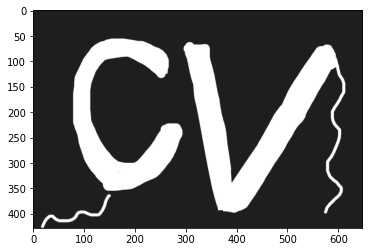

In [47]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
kernel = np.ones((7,7),dtype=np.uint8)
pz = cv2.dilate(cv,kernel,iterations=2)
img_show(cv)

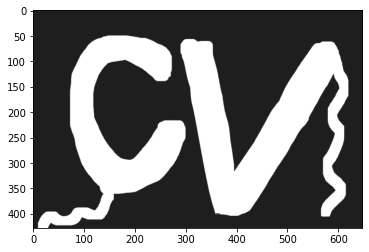

In [48]:
img_show(pz)

# 8.3 通用形态学函数

In [49]:
# 腐蚀膨胀操作是形态学运算的基础
# 将腐蚀膨胀进行组合，可实现开运算，比运算，形态学梯度运算，礼帽运算，黑帽运算，击中不中等多种运算
# opencv提供函数cv2.morphologyEx()来实现上述形态学运算

# dst = cv2.morphologyEx(src,op,kernel[,anchor[,iterations[,borderType]]])
# dst：形态学处理后输出的图像，与愿图像同大小，同类型
# src：需要进行腐蚀的原始图像，图像通道数可以是任意的，但要求图像的深度必须是CV_8U,CV_16U,CV_16S,CV_32F,CV_64F中的一种
# op：操作类型，各种运算操作规则均是将腐蚀和膨胀操作进行组合得到的，见书P178
# 参数kernel,anchor,iterarons,borderType,borderValue与函数cv2.erode()内参数一致

# 8.4 开运算

In [50]:
# 先将图像腐蚀，再对腐蚀的结果进行膨胀（先腐蚀，后膨胀）
# 可以用于去噪，计数等

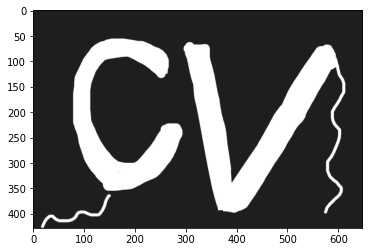

In [53]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
kernel = np.ones((7,7),dtype=np.uint8)
cvOpen = cv2.morphologyEx(cv,cv2.MORPH_OPEN,kernel,iterations=1)
img_show(cv)

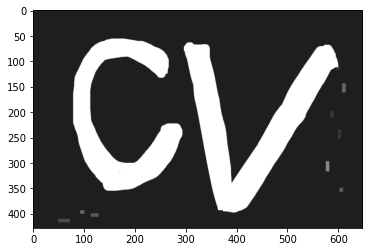

In [54]:
img_show(cvOpen)

# 8.5 闭运算

In [55]:
# 先膨胀，后腐蚀
# 关闭前景物体内的小孔，或去除物体上的小黑点，拼接不同前景

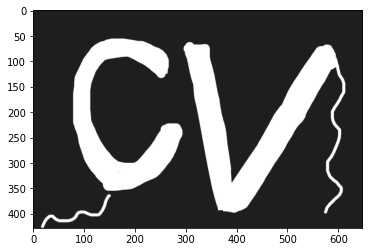

In [59]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
kernel = np.ones((7,7),dtype=np.uint8)
cvClose = cv2.morphologyEx(cv,cv2.MORPH_CLOSE,kernel,iterations=2)
img_show(cv)

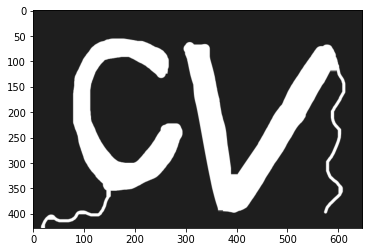

In [60]:
img_show(cvClose)

# 8.6 形态学梯度运算

In [61]:
# 形态学梯度运算：膨胀图像-腐蚀图像
# 该操作可以获取原始图像中前景图像的边缘

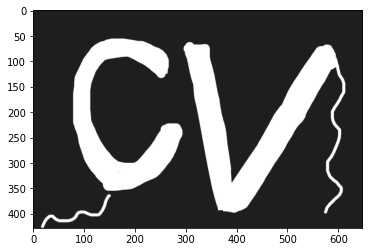

In [64]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
kernel = np.ones((7,7),dtype=np.uint8)
cvGd = cv2.morphologyEx(cv,cv2.MORPH_GRADIENT,kernel,iterations=1)
img_show(cv)

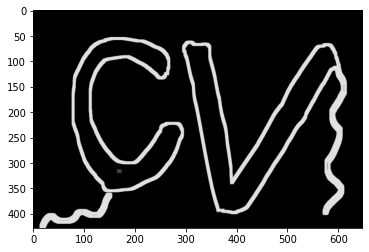

In [65]:
img_show(cvGd)

# 8.7 礼帽运算

In [66]:
# 礼帽运算：原始图像-开运算图像
# 获取图像噪声信息，或得到比原始图像边缘更亮的边缘信息

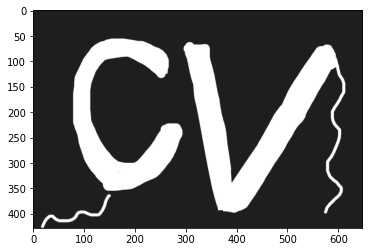

In [70]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
kernel = np.ones((7,7),dtype=np.uint8)
cvTp = cv2.morphologyEx(cv,cv2.MORPH_TOPHAT,kernel,iterations=1)
img_show(cv)

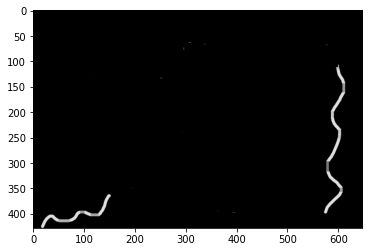

In [71]:
img_show(cvTp)

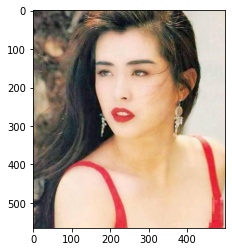

In [79]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
kernel = np.ones((7,7),dtype=np.uint8)
wzxTp = cv2.morphologyEx(wzx,cv2.MORPH_TOPHAT,kernel,iterations=3)
img_show(wzx)

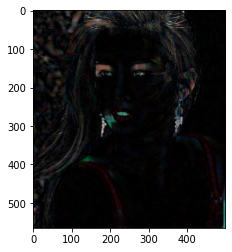

In [80]:
img_show(wzxTp)

# 8.8 黑帽运算

In [81]:
# 黑帽运算：比运算图像-原始图像
# 能获取图像内部的小孔，后前景中的小黑点，或得到比原始图像的边缘更暗的边缘部分

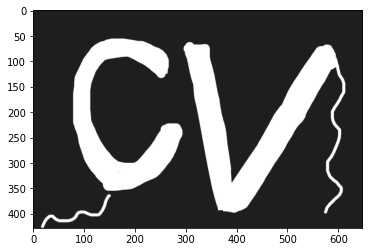

In [82]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
kernel = np.ones((7,7),dtype=np.uint8)
cvBh = cv2.morphologyEx(cv,cv2.MORPH_BLACKHAT,kernel,iterations=1)
img_show(cv)

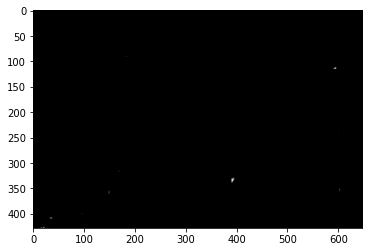

In [83]:
img_show(cvBh)

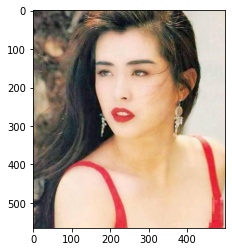

In [92]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
kernel = np.ones((7,7),dtype=np.uint8)
wzxBh = cv2.morphologyEx(wzx,cv2.MORPH_BLACKHAT,kernel,iterations=2)
img_show(wzx)

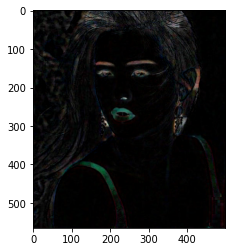

In [93]:
img_show(wzxBh)

# 8.9 核函数

In [95]:
# 通过函数cv2.getStructuringElement()能够构造并返回一个用于形态学处理所使用的结构元素：
# retval = cv2.getStructuringElement(shape,ksize[,anchor])
# shape：形状类型，见书P187：
    # cv2.MORPH_RECT：矩形结构元素，所有元素值都为1
    # cv2.MORPH_CROSS：十字形结构元素，所有元素值都为1
    # cv2.MORPH_ELLIPSE：椭圆行结构元素
# ksize：结构元素大小
# anchor：结构元素锚点位置，默认（-1，-1），是形状的中心，
# 只有十字星型的形状与锚点位置精密相关，在其他情况下，锚点位置只用于形态学运算结果的调整

# 用户也可自己构造任意二进制掩码作为形态学操作中使用的结构元素

In [97]:
kernel11 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
kernel12 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
kernel13 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
print("rect\n", kernel11)
print("cross\n", kernel12)
print("ellipse\n", kernel13)

rect
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
cross
 [[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]
ellipse
 [[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


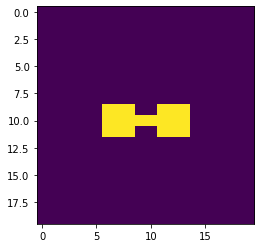

In [124]:
# 观察不同核对形态学操作的影响
img = np.zeros([20,20],dtype=np.uint8)
img[9:12,6:9] = 1
img[10:11,9:11] = 1
img[9:12,11:14] = 1

kernel11 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
kernel12 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
kernel13 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

cvRect = cv2.dilate(img,kernel11)
cvCross = cv2.dilate(img,kernel12)
cvEllipse = cv2.dilate(img,kernel13)

img_show(img)

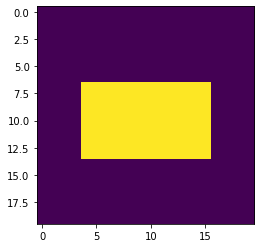

In [125]:
img_show(cvRect)

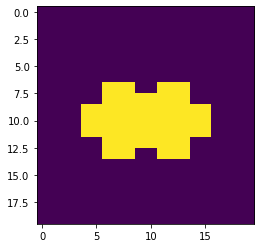

In [126]:
img_show(cvCross)

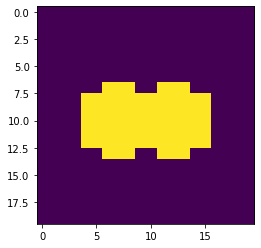

In [127]:
img_show(cvEllipse)